# Descriptive analysis of outcomes

## Set up notebook and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data.'''

    save_path: str = './output/'
    data_read_path: str = '../data/'
    notebook: str = '00_'
    model_text: str = 'descriptive'

paths = Paths()

In [3]:
# Read data
data = pd.read_csv(paths.data_read_path + '02_reformatted_data_ml.csv')
# Add change in disability
data['change_in_disability'] = data['discharge_disability'] - data['prior_disability']


## Disability on arrival and on discharge

In [4]:
cols = [
    'prior_disability',
    'discharge_disability',
    'change_in_disability']

data[cols].describe()

,prior_disability,discharge_disability,change_in_disability
count,153078.000000,153078.000000,153078.000000
mean,1.111061,2.643358,1.532297
std,1.423342,1.881890,1.697791
min,0.000000,0.000000,-5.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,2.000000,1.000000
75%,2.000000,4.000000,2.000000
max,5.000000,6.000000,6.000000


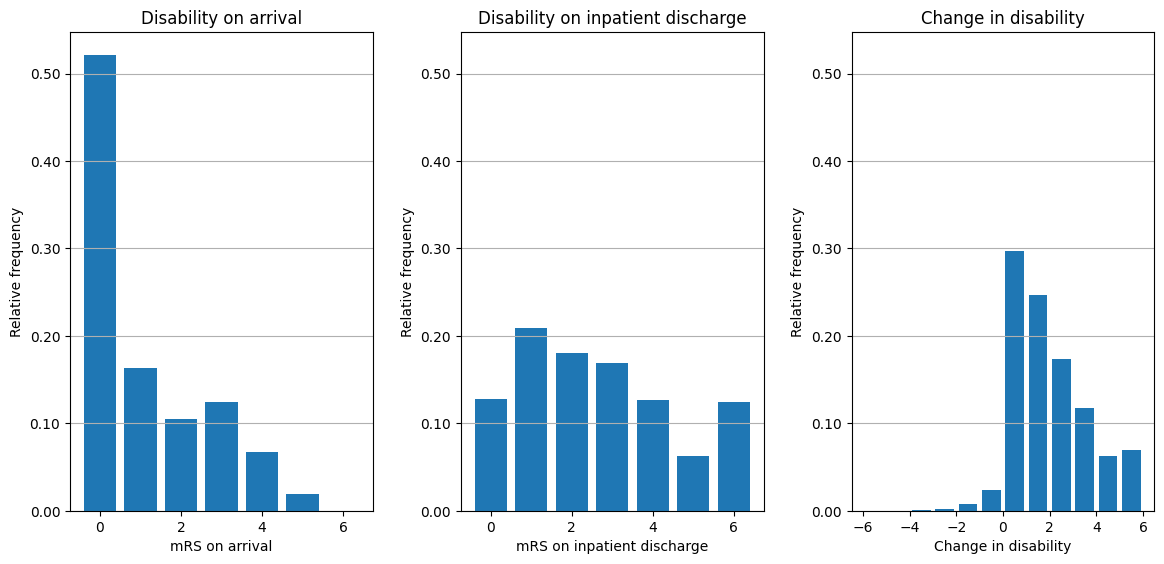

In [5]:
# Function to control decimal places of axis
from matplotlib.ticker import FuncFormatter
def format_ticks(value, _):
    return f"{value:.2f}"  # format value to 2 decimal places


fig = plt.figure(figsize=(12,6))

# Disability on arrival (weights turn chart into relative frequency)
count = len(data)
weights=np.ones(count)/count
ax1 = fig.add_subplot(1,3,1)
ax1.hist(
    data['prior_disability'],
    bins=np.arange(-0.5, 7.5),
    rwidth=0.8,
    weights=weights)
ax1.set_xlabel('mRS on arrival')
ax1.set_ylabel('Relative frequency')
ax1.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax1.set_title('Disability on arrival')
ax1.grid(axis='y')

# Disability on discharge
count = len(data)
weights=np.ones(count)/count
ax2 = fig.add_subplot(1,3,2,sharey=ax1)
ax2.hist(
    data['discharge_disability'],
    bins=np.arange(-0.5, 7.5),
    rwidth=0.8,
    weights=weights)
ax2.set_xlabel('mRS on inpatient discharge')
ax2.set_ylabel('Relative frequency')
ax2.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax2.set_title('Disability on inpatient discharge')
ax2.grid(axis='y')

# Change in disability
count = len(data)
weights=np.ones(count)/count
ax3 = fig.add_subplot(1,3,3,sharey=ax1)
ax3.hist(
    data['change_in_disability'],
    bins=np.arange(-6, 6.5),
    rwidth=0.8,
    weights=weights)
ax3.set_xlabel('Change in disability')
ax3.set_ylabel('Relative frequency')
ax3.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax3.set_title('Change in disability')
ax3.grid(axis='y')

plt.tight_layout(pad=2)
path = paths.save_path + paths.notebook
plt.savefig(path+'disability_histograms.jpg', dpi=300,bbox_inches='tight')

plt.show()

What proportion of patients have an improvement in disability of more than 1 (likely to be a data error)?

In [6]:
sig_improvement = np.mean(data['change_in_disability'] <= -2)
print (f'Proportion of patients with improvement by more than 1 unit: {sig_improvement:0.3f}')

Proportion of patients with improvement by more than 1 unit: 0.010


## Investigate proportion of patients classified as mRS=0-1 on arrival at different hospitals

Here we are checking that no stroke team classifies all patients as having no disability on arrival.

In [7]:
pd.set_option('display.max_rows', 500)

df = data[['stroke_team', 'prior_disability']].copy() # Copy avoids slice warnings
df['arrival mRS = 0'] = df['prior_disability'] == 0
df['arrival mRS = 0-1'] = df['prior_disability'] <= 1
df_groupby = df.groupby('stroke_team').mean()
df_groupby.sort_values('arrival mRS = 0', ascending=False, inplace=True)
df_groupby[['arrival mRS = 0', 'arrival mRS = 0-1']]

,arrival mRS = 0,arrival mRS = 0-1
stroke_team,,
Queen's Medical Centre - Nottingham,0.792060,0.865784
Princess Royal University Hospital HASU,0.766866,0.831768
Ysbyty Gwynedd,0.761530,0.870641
William Harvey Hospital,0.740944,0.839737
Royal Berkshire Hospital,0.722111,0.803015
Queen Elizabeth Hospital Kings Lynn,0.718065,0.807256
Derriford Hospital,0.705615,0.748724
Bronglais Hospital,0.693009,0.750760
Royal Stoke University Hospital,0.682223,0.798112
